Sigara içmemenin sağlığınıza olan etkilerini gözlemledik.
Sigara içmeyenlerde ortalama kalp atış hızı: 72.33 bpm
Sigara içenlerde ortalama kalp atış hızı: 89.50 bpm
Sigara içmeyenlerde ortalama solunum hızı: 17.87 breaths/min
Sigara içenlerde ortalama solunum hızı: 18.65 breaths/min
Sigara içmeyenlerde uyku süresi: 53.00 dakika
Sigara içenlerde uyku süresi: 33.50 dakika
Sigara içmeyenlerde kalp atış hızı varyansı: 2.33
Sigara içenlerde kalp atış hızı varyansı: 1.00
Sigara içmeyenlerde kalp atış hızı standart sapması: 1.53
Sigara içenlerde kalp atış hızı standart sapması: 1.00
Sigara içmeyenlerde solunum hızı varyansı: 0.04
Sigara içenlerde solunum hızı varyansı: 0.01
Sigara içmeyenlerde solunum hızı standart sapması: 0.21
Sigara içenlerde solunum hızı standart sapması: 0.10

Sigara içmemenin sağlık üzerindeki olumlu etkilerini gözlemledik: Daha sağlıklı bir kalp, daha iyi bir solunum hızı ve daha verimli bir uyku!


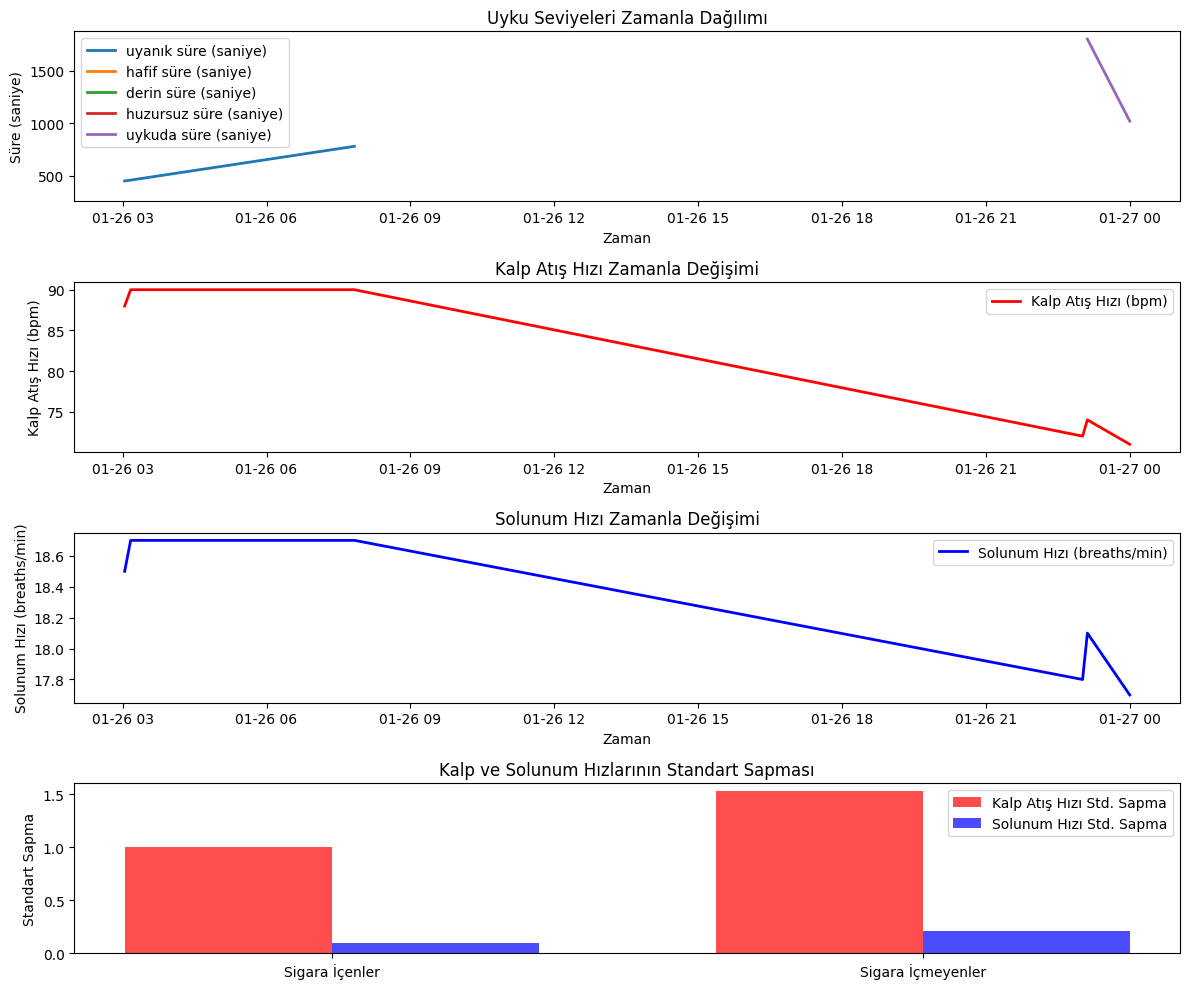

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

sleep_data = [
    {
        "UykuTarihi": "2020-01-27",
        "sigara_iciyor": False,
        "seviyeler": {
            "veri": [
                {"dateTime": "2020-01-26T23:01:00.000", "seviye": "huzursuz", "saniye": 360},
                {"dateTime": "2020-01-26T23:07:00.000", "seviye": "uykuda", "saniye": 1800},
                {"dateTime": "2020-01-27T00:00:00.000", "seviye": "uykuda", "saniye": 1020}
            ]
        }
    },
    {
        "UykuTarihi": "2020-01-26",
        "sigara_iciyor": True,
        "seviyeler": {
            "veri": [
                {"dateTime": "2020-01-26T03:02:30.000", "seviye": "uyanık", "saniye": 450},
                {"dateTime": "2020-01-26T03:10:00.000", "seviye": "hafif", "saniye": 330},
                {"dateTime": "2020-01-26T03:15:30.000", "seviye": "derin", "saniye": 450},
                {"dateTime": "2020-01-26T07:50:00.000", "seviye": "uyanık", "saniye": 780}
            ]
        }
    }
]

heart_rate_data = [
    {"tarihSaat": "2020-01-26T23:01:00.000", "kalpHızı": 72, "sigara_iciyor": False},
    {"tarihSaat": "2020-01-26T23:07:00.000", "kalpHızı": 74, "sigara_iciyor": False},
    {"tarihSaat": "2020-01-26T23:15:30.000", "kalpHızı": 75, "sigara_iciyor": False},
    {"tarihSaat": "2020-01-27T00:00:00.000", "kalpHızı": 71, "sigara_iciyor": False},
    {"tarihSaat": "2020-01-26T03:02:30.000", "kalpHızı": 88, "sigara_iciyor": True},
    {"tarihSaat": "2020-01-26T03:10:00.000", "kalpHızı": 90, "sigara_iciyor": True},
]

breathing_rate_data = [
    {"tarihSaat": "2020-01-26T23:01:00.000", "nefes_alma_orani": 17.8, "sigara_iciyor": False},
    {"tarihSaat": "2020-01-26T23:07:00.000", "nefes_alma_orani": 18.1, "sigara_iciyor": False},
    {"tarihSaat": "2020-01-26T23:15:30.000", "nefes_alma_orani": 18.4, "sigara_iciyor": False},
    {"tarihSaat": "2020-01-27T00:00:00.000", "nefes_alma_orani": 17.7, "sigara_iciyor": False},
    {"tarihSaat": "2020-01-26T03:02:30.000", "nefes_alma_orani": 18.5, "sigara_iciyor": True},
    {"tarihSaat": "2020-01-26T03:10:00.000", "nefes_alma_orani": 18.7, "sigara_iciyor": True},
]

def create_dataframe(data, columns):
    return pd.DataFrame(data, columns=columns)

sleep_df = create_dataframe(
    [{"dateTime": entry["dateTime"], "seviye": entry["seviye"], "saniye": entry["saniye"], "sigara_iciyor": sleep["sigara_iciyor"]}
     for sleep in sleep_data for entry in sleep["seviyeler"]["veri"]],
    ["dateTime", "seviye", "saniye", "sigara_iciyor"]
)

heart_rate_df = create_dataframe(heart_rate_data, ["tarihSaat", "kalpHızı", "sigara_iciyor"])

breathing_rate_df = create_dataframe(breathing_rate_data, ["tarihSaat", "nefes_alma_orani", "sigara_iciyor"])

sleep_df["dateTime"] = pd.to_datetime(sleep_df["dateTime"])
heart_rate_df["tarihSaat"] = pd.to_datetime(heart_rate_df["tarihSaat"])
breathing_rate_df["tarihSaat"] = pd.to_datetime(breathing_rate_df["tarihSaat"])

merged_df = pd.merge_asof(sleep_df.sort_values('dateTime'), heart_rate_df.sort_values('tarihSaat'), left_on='dateTime', right_on='tarihSaat', direction='nearest')
merged_df = pd.merge_asof(merged_df.sort_values('dateTime'), breathing_rate_df.sort_values('tarihSaat'), left_on='dateTime', right_on='tarihSaat', direction='nearest')

def analyze_smoking_impact(merged_df):
    no_smoking_df = merged_df[merged_df['sigara_iciyor'] == False]
    smoking_df = merged_df[merged_df['sigara_iciyor'] == True]

    avg_no_smoking_heart_rate = no_smoking_df['kalpHızı'].mean()
    avg_smoking_heart_rate = smoking_df['kalpHızı'].mean()

    avg_no_smoking_breathing_rate = no_smoking_df['nefes_alma_orani'].mean()
    avg_smoking_breathing_rate = smoking_df['nefes_alma_orani'].mean()

    avg_no_smoking_sleep_duration = no_smoking_df['saniye'].sum() / 60
    avg_smoking_sleep_duration = smoking_df['saniye'].sum() / 60

    var_no_smoking_heart_rate = no_smoking_df['kalpHızı'].var()
    var_smoking_heart_rate = smoking_df['kalpHızı'].var()

    std_no_smoking_heart_rate = no_smoking_df['kalpHızı'].std()
    std_smoking_heart_rate = smoking_df['kalpHızı'].std()

    var_no_smoking_breathing_rate = no_smoking_df['nefes_alma_orani'].var()
    var_smoking_breathing_rate = smoking_df['nefes_alma_orani'].var()

    std_no_smoking_breathing_rate = no_smoking_df['nefes_alma_orani'].std()
    std_smoking_breathing_rate = smoking_df['nefes_alma_orani'].std()

    print("Sigara içmemenin sağlığınıza olan etkilerini gözlemledik.")
    print(f"Sigara içmeyenlerde ortalama kalp atış hızı: {avg_no_smoking_heart_rate:.2f} bpm")
    print(f"Sigara içenlerde ortalama kalp atış hızı: {avg_smoking_heart_rate:.2f} bpm")
    print(f"Sigara içmeyenlerde ortalama solunum hızı: {avg_no_smoking_breathing_rate:.2f} breaths/min")
    print(f"Sigara içenlerde ortalama solunum hızı: {avg_smoking_breathing_rate:.2f} breaths/min")
    print(f"Sigara içmeyenlerde uyku süresi: {avg_no_smoking_sleep_duration:.2f} dakika")
    print(f"Sigara içenlerde uyku süresi: {avg_smoking_sleep_duration:.2f} dakika")

    print(f"Sigara içmeyenlerde kalp atış hızı varyansı: {var_no_smoking_heart_rate:.2f}")
    print(f"Sigara içenlerde kalp atış hızı varyansı: {var_smoking_heart_rate:.2f}")
    print(f"Sigara içmeyenlerde kalp atış hızı standart sapması: {std_no_smoking_heart_rate:.2f}")
    print(f"Sigara içenlerde kalp atış hızı standart sapması: {std_smoking_heart_rate:.2f}")

    print(f"Sigara içmeyenlerde solunum hızı varyansı: {var_no_smoking_breathing_rate:.2f}")
    print(f"Sigara içenlerde solunum hızı varyansı: {var_smoking_breathing_rate:.2f}")
    print(f"Sigara içmeyenlerde solunum hızı standart sapması: {std_no_smoking_breathing_rate:.2f}")
    print(f"Sigara içenlerde solunum hızı standart sapması: {std_smoking_breathing_rate:.2f}")

    if avg_no_smoking_heart_rate < avg_smoking_heart_rate and avg_no_smoking_breathing_rate < avg_smoking_breathing_rate and avg_no_smoking_sleep_duration > avg_smoking_sleep_duration:
        print("\nSigara içmemenin sağlık üzerindeki olumlu etkilerini gözlemledik: Daha sağlıklı bir kalp, daha iyi bir solunum hızı ve daha verimli bir uyku!")
    else:
        print("\nSigara içmemenin etkileri daha belirgin hale gelmeyebilir. Ancak uzun vadeli faydalarını gözlemlemeye devam edin.")

def plot_sleep_heart_rate_breathing(merged_df):
    plt.figure(figsize=(12, 10))

    plt.subplot(4, 1, 1)
    for level in merged_df['seviye'].unique():
        level_data = merged_df[merged_df['seviye'] == level]
        plt.plot(level_data['dateTime'], level_data['saniye'], label=f'{level} süre (saniye)', linewidth=2)
    plt.title('Uyku Seviyeleri Zamanla Dağılımı')
    plt.xlabel('Zaman')
    plt.ylabel('Süre (saniye)')
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(merged_df['dateTime'], merged_df['kalpHızı'], color='red', label='Kalp Atış Hızı (bpm)', linewidth=2)
    plt.title('Kalp Atış Hızı Zamanla Değişimi')
    plt.xlabel('Zaman')
    plt.ylabel('Kalp Atış Hızı (bpm)')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(merged_df['dateTime'], merged_df['nefes_alma_orani'], color='blue', label='Solunum Hızı (breaths/min)', linewidth=2)
    plt.title('Solunum Hızı Zamanla Değişimi')
    plt.xlabel('Zaman')
    plt.ylabel('Solunum Hızı (breaths/min)')
    plt.legend()

    plt.subplot(4, 1, 4)
    groups = ['Sigara İçenler', 'Sigara İçmeyenler']
    heart_rate_std = [
        merged_df[merged_df['sigara_iciyor'] == True]['kalpHızı'].std(),
        merged_df[merged_df['sigara_iciyor'] == False]['kalpHızı'].std()
    ]
    breathing_rate_std = [
        merged_df[merged_df['sigara_iciyor'] == True]['nefes_alma_orani'].std(),
        merged_df[merged_df['sigara_iciyor'] == False]['nefes_alma_orani'].std()
    ]
    bar_width = 0.35
    x = range(len(groups))
    plt.bar(x, heart_rate_std, width=bar_width, label='Kalp Atış Hızı Std. Sapma', color='red', alpha=0.7)
    plt.bar([p + bar_width for p in x], breathing_rate_std, width=bar_width, label='Solunum Hızı Std. Sapma', color='blue', alpha=0.7)
    plt.xticks([p + bar_width / 2 for p in x], groups)
    plt.title('Kalp ve Solunum Hızlarının Standart Sapması')
    plt.ylabel('Standart Sapma')
    plt.legend()

    plt.tight_layout()
    plt.show()

analyze_smoking_impact(merged_df)
plot_sleep_heart_rate_breathing(merged_df)